# 데이터 재구조화

- 재구조화 함수
>- pd.cut(), pd.qcut() : 데이터 구간화
>- pd.get_dummies : 원-핫 코딩
>- T : 데이터 전치
>- pivot(), pd.pivot_table() : 피봇 테이블
>- melt() : 열, 행 전환
>- stack(), unsatck() : 행, 열 인덱스 전환

## 데이터 구간화
- 연속형 변수를 범주형 변수로 만드는 방법을 데이터구간화(Data Binning)이라고 함
<br>
<br>
- 동일 길이로 나누기 : pd.cut()
- 동일 개수로 나누기 : pd.qcut()

In [34]:
# 판다스 라이브러리 불러오기
import pandas as pd

# 파일경로를 찾고 변수 file_path에 저장
file_path = 'C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/exam_sample.csv'

# read_csv()함수로 데이터프레임 변환
df = pd.read_csv(file_path)
df

# BMI 변수에 대해서 3개 동일한 길이로 범주형 변수로 만들어보겠습니다.
df1 = pd.cut(df.math, 3)
df1

0    (43.333, 66.667]
1    (43.333, 66.667]
2    (43.333, 66.667]
3     (19.93, 43.333]
4      (66.667, 90.0]
5    (43.333, 66.667]
6      (66.667, 90.0]
7      (66.667, 90.0]
8     (19.93, 43.333]
9    (43.333, 66.667]
Name: math, dtype: category
Categories (3, interval[float64, right]): [(19.93, 43.333] < (43.333, 66.667] < (66.667, 90.0]]

In [23]:
# BMI 변수에 3개 구간의 범주를 그룹 함수를 추가해서 각 범주의 그룹별로 agg() 함수인 개수(count), 평균(mean), 표준편차(std), 최소값(min), 최대값(max) 값을 계산해봅니다
df2 = df.math.groupby(df1)
df3 = df2.agg(['count', 'mean', 'std', 'min', 'max'])
df3

,count,mean,std,min,max
math,,,,,
"(19.93, 43.333]",2,25.000000,7.071068,20,30
"(43.333, 66.667]",5,51.000000,5.477226,45,60
"(66.667, 90.0]",3,86.666667,5.773503,80,90


In [24]:
# pd.qcut() 함수를 사용 BMI에 대해서 각 범주 구간 별로 동일하게 3개의 개수를 가지도록 범주를 만들 수도 있습니다. 이때 labels=False로 설정하여 label이 0, 1, 2 구간을 0부터 순차적으로 1씩 증가하게 합니다.
df4 = pd.qcut(df.math, 3, labels=False)
df4

0    0
1    1
2    0
3    0
4    2
5    0
6    2
7    2
8    0
9    0
Name: math, dtype: int64

In [26]:
# 아래부터 labels = np.arange(3, 0, -1)로 직접 지정하면 label이 3, 2, 1로부터 1씩 줄어드는 순서로 할당이 됩니다. 위의 label과 정반대로 할당이 되었습니다

import numpy as np
df5 = pd.qcut(df.math, 3, labels=np.arange(3, 0, -1))
df5

0    3
1    2
2    3
3    3
4    1
5    3
6    1
7    1
8    3
9    3
Name: math, dtype: category
Categories (3, int64): [3 < 2 < 1]

In [27]:
# [3 < 2 < 1] 순서로 동일 개수로 나눈 3개의 그룹별 통계량을 계산할 수 있습니다.
df6 = df.math.groupby(df5)
df7 = df6.agg(['count', 'mean', 'std', 'min', 'max'])
df7

,count,mean,std,min,max
math,,,,,
3,6,40.833333,12.812754,20,50
2,1,60.000000,NaN,60,60
1,3,86.666667,5.773503,80,90


## 원-핫인코딩
- 딥러닝 알고리즘은 수치 데이터만 이해할 수 있기 때문에 기계가 이해할 수 있는 형태로 데이터를 변환해야 하는데 이때 범주형 데이터를 원핫인코딩 형태로 변환합니다.
- 원-핫인코딩이란 해당하는 하나의 데이터만 1로 변경해 주고 나머지는 0(dummy)으로 변경하는 과정입니다.
<br>
<br>
- pd.get_dummies(df)

In [28]:
# 유형확인
df.dtypes

student_no     int64
class         object
science        int64
english        int64
math           int64
sex           object
dtype: object

In [29]:
# 범주형 원핫코딩
df = pd.get_dummies(df)
df

,student_no,science,english,math,class_A,class_B,class_C,sex_m,sex_w
0,1,50,98,50,1,0,0,1,0
1,2,60,97,60,1,0,0,0,1
2,3,78,86,45,1,0,0,0,1
3,4,58,98,30,1,0,0,1,0
4,5,65,80,90,0,1,0,0,1
5,6,98,89,50,0,1,0,1,0
6,7,45,90,80,0,1,0,1,0
7,8,25,78,90,0,1,0,0,1
8,9,15,98,20,0,0,1,0,1
9,10,45,93,50,0,0,1,0,1


## 데이터 전치
- 데이터프레임 행과 열의 기준(축)을 바꾸는 방법을 데이터 전치(Transpose)라고 합니다.
- 데이터프레임.T

In [30]:
# 원 데이터
df

,student_no,science,english,math,class_A,class_B,class_C,sex_m,sex_w
0,1,50,98,50,1,0,0,1,0
1,2,60,97,60,1,0,0,0,1
2,3,78,86,45,1,0,0,0,1
3,4,58,98,30,1,0,0,1,0
4,5,65,80,90,0,1,0,0,1
5,6,98,89,50,0,1,0,1,0
6,7,45,90,80,0,1,0,1,0
7,8,25,78,90,0,1,0,0,1
8,9,15,98,20,0,0,1,0,1
9,10,45,93,50,0,0,1,0,1


In [31]:
# 전치 데이터
df.T

,0,1,2,3,4,5,6,7,8,9
student_no,1,2,3,4,5,6,7,8,9,10
science,50,60,78,58,65,98,45,25,15,45
english,98,97,86,98,80,89,90,78,98,93
math,50,60,45,30,90,50,80,90,20,50
class_A,1,1,1,1,0,0,0,0,0,0
class_B,0,0,0,0,1,1,1,1,0,0
class_C,0,0,0,0,0,0,0,0,1,1
sex_m,1,0,0,1,0,1,1,0,0,0
sex_w,0,1,1,0,1,0,0,1,1,1


## 피봇테이블
- 피봇 테이블이란 많은 양의 데이터에서 필요한 자료만을 뽑아 새롭게 데이터를 재구성하는 기능입니다.
- 피봇 테이블을 활용하면 사용자가 원하는 대로 데이터를 정렬하고 필터링할 수 있습니다.

> - df.pivot(index, columns, values)<br>
> - df.pivot_table(data, index, columns, values, aggfunc)

In [32]:
# 원자료와 피봇 자료는 확인해보자
df

,student_no,science,english,math,class_A,class_B,class_C,sex_m,sex_w
0,1,50,98,50,1,0,0,1,0
1,2,60,97,60,1,0,0,0,1
2,3,78,86,45,1,0,0,0,1
3,4,58,98,30,1,0,0,1,0
4,5,65,80,90,0,1,0,0,1
5,6,98,89,50,0,1,0,1,0
6,7,45,90,80,0,1,0,1,0
7,8,25,78,90,0,1,0,0,1
8,9,15,98,20,0,0,1,0,1
9,10,45,93,50,0,0,1,0,1


In [36]:
# 반(class) 변수를 행 데이터로 피봇
file_path = 'C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/exam_sample.csv'
pd.pivot_table(df, index='class', columns = 'sex', values='science')

sex,m,w
class,,
A,54.0,69.0
B,71.5,45.0
C,NaN,30.0


In [37]:
# 성별(sex) 변수를 행 데이터로 피봇
pd.pivot_table(df, index='sex', columns='class', values='science')

class,A,B,C
sex,,,
m,54.0,71.5,NaN
w,69.0,45.0,30.0


## 멜트
- 멜트는 열을 행으로 변경하는 재구조화 과정입니다.
>- pd.melt(df, id_vars=['id1', 'id2', ...])

In [38]:
# 멜트 함수
pd.melt(df, id_vars=['student_no', 'class'])

,student_no,class,variable,value
0,1,A,science,50
1,2,A,science,60
2,3,A,science,78
3,4,A,science,58
4,5,B,science,65
5,6,B,science,98
6,7,B,science,45
7,8,B,science,25
8,9,C,science,15
9,10,C,science,45


## 스택/언스택
- 행 인덱스와 열 인덱스 교환시 사용하는 기능입니다.
>- stack() : 열 인덱스를 행 인덱스로 변환
>- unstack() : 행 인덱스를 열 인덱스로 변환

In [39]:
# 스택
df5 = df.stack()
df5


0  student_no     1
   class          A
   science       50
   english       98
   math          50
   sex            m
1  student_no     2
   class          A
   science       60
   english       97
   math          60
   sex            w
2  student_no     3
   class          A
   science       78
   english       86
   math          45
   sex            w
3  student_no     4
   class          A
   science       58
   english       98
   math          30
   sex            m
4  student_no     5
   class          B
   science       65
   english       80
   math          90
   sex            w
5  student_no     6
   class          B
   science       98
   english       89
   math          50
   sex            m
6  student_no     7
   class          B
   science       45
   english       90
   math          80
   sex            m
7  student_no     8
   class          B
   science       25
   english       78
   math          90
   sex            w
8  student_no     9
   class          C


In [40]:
# 스택 후의 데이터프레임은 위에 보는 것처럼 인덱스 레벨이 3개 있는 멀티인데긋(multiIndex)가 되었습니다. 어던 레벨이 칼럼으로 이동해서 언스택되는지 실습해 보겠습니다.
# 스택으루 위에서 아래로 높게 올린 데이터프레임을(df5)를 이번에는 거꾸로 왼족으로 오른쪽으로 넓게 언 스택으로 펼처 봅니다.
df6 = df.unstack(level=-1)
df6

student_no  0     1
            1     2
            2     3
            3     4
            4     5
            5     6
            6     7
            7     8
            8     9
            9    10
class       0     A
            1     A
            2     A
            3     A
            4     B
            5     B
            6     B
            7     B
            8     C
            9     C
science     0    50
            1    60
            2    78
            3    58
            4    65
            5    98
            6    45
            7    25
            8    15
            9    45
english     0    98
            1    97
            2    86
            3    98
            4    80
            5    89
            6    90
            7    78
            8    98
            9    93
math        0    50
            1    60
            2    45
            3    30
            4    90
            5    50
            6    80
            7    90
            8    20
            9    50


# 데이터 그룹 분석
- 특정한 조건에 맞는 데이터가 하나 이상 데이터 그룹을 이루는 경우에는 그룹의 특성을 보여주는 그룹 분석(group analysis)을 자주 사용합니다.

## 그룹 분석
- 그룹 분석의 일반적 단계
> - 몇몇 기준(범주형)에 따라 여러 그룹으로 데이터를 분할(splitting) - 반별 그룹
> - 각 그룹에 독립적으로 함수를 적용(applying) - 반별 평균
> - 결과물들을 하나의 데이터 구조로 결합(combining) - 반별 평균결합

### 집계 함수 사용
- groupby 함수의 인수로는 다음과 같은 값을 사용
> - 열 또는 열의 리스트
> - 행 인덱스
<br>
<br>
- 그룹분석 공식
> 1. 그룹 분석은 대부분 '범주형변수' 그룹 연산 기준이 됩니다.
> 1. 많은 분석이 범주형(그룹)과 연속형이 결합된 그룹 분석으로 진행됩니다.
<br>
<br>
- df.groupby(['그룹변수'])
- df.get_group('그룹변수지정')

In [1]:
# 판다스 라이브러리 불러오기
import pandas as pd

# 파일경로를 찾고 변수 file_path에 저장
file_path = 'C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/exam_sample.csv'

# read_csv()함수로 데이터프레임 변환
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [3]:
# 반별로 그룹화(A, B, C반)
# 반별 그룹 오브젝트만 생성
df1 = df.groupby(['class'])
df1

In [4]:
# 반 중 A반 그룹만 확인
df1.get_group('A')

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m


In [6]:
# 반별 그룹 평균 확인
df.groupby('class').mean()

,student_no,science,english,math
class,,,,
A,2.5,61.50,94.75,46.25
B,6.5,58.25,84.25,77.50
C,9.5,30.00,95.50,35.00


In [9]:
# 반별, 성별 그룹 평균 확인
df.groupby(['class', 'sex']).mean()

student_no  science  english  math
class sex                                    
A     m           2.5     54.0     98.0  40.0
      w           2.5     69.0     91.5  52.5
B     m           6.5     71.5     89.5  65.0
      w           6.5     45.0     79.0  90.0
C     w           9.5     30.0     95.5  35.0

In [10]:
# 반별 수학 평균
df['math'].groupby(df['class']).mean()
df.groupby(df['class'])['math'].mean()

class
A    46.25
B    77.50
C    35.00
Name: math, dtype: float64

In [11]:
# 반별 수학 개수
df['math'].groupby(df['class']).count()

class
A    4
B    4
C    2
Name: math, dtype: int64

In [16]:
# 성별 수학평균
df_mean = df['math'].groupby(df['sex']).mean()
sexgroup = df.groupby('sex')
print(df_mean)
print(sexgroup)
print(sexgroup.groups)

sex
m    52.500000
w    59.166667
Name: math, dtype: float64
{'m': [0, 3, 5, 6], 'w': [1, 2, 4, 7, 8, 9]}


In [17]:
# 남학생 수학평균
male = sexgroup.get_group('m')
subset = male[['sex', 'math']]
print(male)
print(subset)

   student_no class  science  english  math sex
0           1     A       50       98    50   m
3           4     A       58       98    30   m
5           6     B       98       89    50   m
6           7     B       45       90    80   m
  sex  math
0   m    50
3   m    30
5   m    50
6   m    80


In [18]:
# 만일 Null이 있다면 그룹화로 특정 집단 Null 변경
# fill missing age with median age for each group (teacher, student)
# df["age"].fillna(df.groupby("job")["age"].transform("median"),inflace=True))

# 시계열 데이터
- 타임스탬프(Timestamp)
> - 특정 시간을 의미하는 자료형
> - to_datetime()함수로 생성 가능하며 날짜 형태의 자료형을 시계열 타입으로 변환
- 기간(Period)
> - 일정 기간을 의미
> - Timestamp(datetime)를 기간에 따른 자료형으로 이용하고자 할 때 사용

## 타임스탬프
- 판다스에서 시계열 자료를 사용하려면 먼저 인덱스를 datetime 인덱스 자료형으로 만들어야 합니다. 
- datetime 인덱스는 특정한 시점을 기록한 타임스탬프(timestamp) 형식의 시계열 자료를 다루기 위한 특별한 인덱스입니다.
- pd.to_datetime()

In [21]:
# 판다스 라이브러리 불러오기
import pandas as pd
# 파일경로를 찾고 변수 file_path에 저장
file_path = 'C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/timeseries.csv'
#read_csv()함수로 데이터프레임 변환
df= pd.read_csv(file_path)

#현재 날짜를 나타내는 Date컬럼은 문자형(object)이므로 to_datetime()함수를 이용해서 Date컬럼을 시계열 객체(Timestamp)로 변환
df.info()
df['new_Date'] = pd.to_datetime(df['Date'])
print(df.head())
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes
         Date  Close  Start   High    Low  Volume   new_Date
0  2015-07-02  10100  10850  10900  10000  137977 2015-07-02
1  2016-06-29  10700  10550  10900   9990  170253 2016-06-29
2  2017-06-28  10400  10900  10950  10150  155769 2017-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2019-06-26  10800  10900  11000  10700   63039 2019-06-26




In [22]:
print(df.info())
print("\n")
print(type(df['new_Date'][0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5 non-null      object        
 1   Close     5 non-null      int64         
 2   Start     5 non-null      int64         
 3   High      5 non-null      int64         
 4   Low       5 non-null      int64         
 5   Volume    5 non-null      int64         
 6   new_Date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 408.0+ bytes
None


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [23]:
# 기존 Date열을 지우고 new_Date를 인덱스로 지정
# 데이터 요약 정보를 보면, 인덱스가 DatetimeIndex 변경되었고 2015년 07월 02일에서 2019년 06월 26일 사이에 5개 날짜가 있습니다.
df.drop('Date', axis = 1, inplace=True)
df.set_index('new_Date', inplace=True)
print(df.head())
print('\n')
print(df.info())

            Close  Start   High    Low  Volume
new_Date                                      
2015-07-02  10100  10850  10900  10000  137977
2016-06-29  10700  10550  10900   9990  170253
2017-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2019-06-26  10800  10900  11000  10700   63039


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   5 non-null      int64
 1   Start   5 non-null      int64
 2   High    5 non-null      int64
 3   Low     5 non-null      int64
 4   Volume  5 non-null      int64
dtypes: int64(5)
memory usage: 240.0 bytes
None


In [26]:
# Timestamp와 Period의 차이 확인, Timestamp를 Period로 변환
# Period 객체는 to_period(freq="기간인수")를 통해 datetime 변수에 대해 어떤 기간에 따른 자료형을 생성하고자 할 때 주로 활용합니다. 아무 자료형이나 사용할 수 없고 datetime 유형에 대해서만 적용 가능합니다.
dates = ['2020-01-01', '2020-03-01', '2021-09-01']
ts_dates = pd.to_datetime(dates)
print(ts_dates)
print("\n")

DatetimeIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)




In [29]:
# Timestamp를 Period변환
pr_day = ts_dates.to_period(freq='D')  #1일의 기간
print(pr_day)
pr_month = ts_dates.to_period(freq="M")  #1개월의 기간
print(pr_month)
pr_year = ts_dates.to_period(freq='A')  #1년의 기간
print(pr_year)

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]')
PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]')
PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]')


## 기간 함수
- pd.date_range()
- pd.period_range()

In [31]:
# date_range()
# 타임스탬프를 배열하는 date_range()는 파이썬 내장 함수 range() 함수와 비슷한 개념입니다. 2020년 01월 01일부터 월의 시작일 간격으로 6개를 생성했습니다. 이렇게 freq 인자를 통해 유연한 시간 생성이 가능합니다.
#import pandas as pd
timestamp_df = pd.date_range(start = '2020-01-01', #날짜 범위 시작
                            end = None, #날짜 범위 끝
                            periods = 6, # 생성할 Timestamp 개수
                            freq = 'MS', #시간 간격(MS: 월의 시작일)
                            tz = 'Asia/Seoul') # 시간대(timezone)
timestamp_df

DatetimeIndex(['2020-01-01 00:00:00+09:00', '2020-02-01 00:00:00+09:00',
               '2020-03-01 00:00:00+09:00', '2020-04-01 00:00:00+09:00',
               '2020-05-01 00:00:00+09:00', '2020-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [35]:
# period_range()
# Period는 기간을 나타내는 자료형이므로, 배열을 적용할 때 freq = 인자는 기간의 단위를 의미합니다.

# 1개월 기간
pr_m = pd.period_range(start = '2020-01-01', end = None, periods = 3, freq = 'M')
print(pr_m)
print('\n')

# 1시간 기간
pr_h = pd.period_range(start = '2020-01-01', end = None, periods = 3, freq = 'H')
print(pr_h)
print('\n')

# 5시간 기간
pr_5h = pd.period_range(start = '2020-01-01', end = None, periods = 3, freq = '5H')
print(pr_5h)

PeriodIndex(['2020-01', '2020-02', '2020-03'], dtype='period[M]')


PeriodIndex(['2020-01-01 00:00', '2020-01-01 01:00', '2020-01-01 02:00'], dtype='period[H]')


PeriodIndex(['2020-01-01 00:00', '2020-01-01 05:00', '2020-01-01 10:00'], dtype='period[5H]')


In [37]:
# 시계열 활용
# 날짜 데이터 분리 날짜 데이터 분리 : dt.year, dt.month, dt.day
# 판다스 라이브러리 불러오기
import pandas as pd

# 파일경로를 찾고 변수 file_path에 저장
file_path = 'C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/timeseries.csv'
#read_csv()함수로 데이터프레임 변환
df= pd.read_csv(file_path)
df.info()
df['new_Date'] = pd.to_datetime(df['Date'])
print(df.head())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes
         Date  Close  Start   High    Low  Volume   new_Date
0  2015-07-02  10100  10850  10900  10000  137977 2015-07-02
1  2016-06-29  10700  10550  10900   9990  170253 2016-06-29
2  2017-06-28  10400  10900  10950  10150  155769 2017-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2019-06-26  10800  10900  11000  10700   63039 2019-06-26




In [38]:
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
df.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26


In [39]:
# to_period() 함수를 이용해 표기 변경
df['Date_yr'] = df['new_Date'].dt.to_period(freq = 'A')  # 연도까지
df['Date-m'] = df['new_Date'].dt.to_period(freq = 'M')  #연월까지
df.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_yr,Date-m
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015,2015-07
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29,2016,2016-06
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28,2017,2017-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019,2019-06


In [40]:
# 날짜 인ㅇ덱스 지정
df.set_index('new_Date', inplace = True)
df.head()

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date-m
new_Date,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016,2016-06
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017,2017-06
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019,2019-06


In [43]:
# 날짜 인덱싱
print(df.loc['2015-07'])  # 7월에 해당하는 row 인덱싱
print('\n')
print(df['2019-06']) # 6월에 해당하는 row 인덱싱
print('\n')
print(df['2018-06-25':'2018-06-20']) # 해당기간의 인덱싱

                  Date  Close  Start   High    Low  Volume  Year  Month  Day  \
new_Date                                                                       
2015-07-02  2015-07-02  10100  10850  10900  10000  137977  2015      7    2   

           Date_yr   Date-m  
new_Date                     
2015-07-02    2015  2015-07  


                  Date  Close  Start   High    Low  Volume  Year  Month  Day  \
new_Date                                                                       
2019-06-26  2019-06-26  10800  10900  11000  10700   63039  2019      6   26   

           Date_yr   Date-m  
new_Date                     
2019-06-26    2019  2019-06  


Empty DataFrame
Columns: [Date, Close, Start, High, Low, Volume, Year, Month, Day, Date_yr, Date-m]
Index: []


C:\Users\BurgerC\AppData\Local\Temp\ipykernel_11412\556092563.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(df['2019-06']) # 6월에 해당하는 row 인덱싱


In [44]:
# 오늘 날짜와 차리 열 추가
today = pd.to_datetime('2020-03-18')
df['time_diff'] = today - df.index
df.head()

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date-m,time_diff
new_Date,,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07,1721 days
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016,2016-06,1358 days
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017,2017-06,994 days
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06,630 days
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019,2019-06,266 days


<AxesSubplot:xlabel='new_Date'>

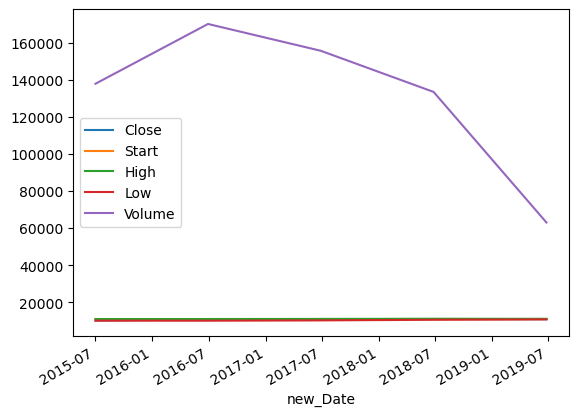

In [48]:
# 데이터를 다시 불러와 시간 인덱스 지정 후 단순 시각화
# 판다스 라이브러리 불러오기
import pandas as pd

# 파일경로를 찾고 변수 file_path에 저장
file_path = 'C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/timeseries.csv'
#read_csv()함수로 데이터프레임 변환
df= pd.read_csv(file_path)
df['new_Date'] = pd.to_datetime(df['Date'])
df.set_index('new_Date', inplace=True)
df.plot()